In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#importing dataset

def parser(df):
    return datetime.strptime(df,'%Y-%m') 

df=pd.read_csv(r'D:\Data Science\Dataset\Time series\monthly-beer-production-in-austr.csv',
              parse_dates=[0],date_parser=parser,index_col=[0])
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [3]:
df.columns=['Beer']
df.head()

,Beer
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


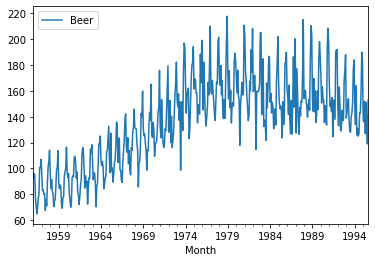

In [4]:
df.plot()

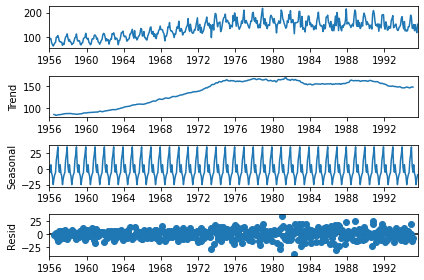

In [5]:
decompose=seasonal_decompose (df,model='add')
decompose.plot();

# Testing for Stationary - ADFuller test

In [6]:
def test_stationary(df):
    rm=df.rolling(12).mean()
    rstd=df.rolling(12).std()
    plt.plot(df,color='blue',label='original')
    plt.plot(rm, color='red', label='Rolling Mean')
    plt.plot(rstd, color='black', label='Rolling Std')
    plt.show()
    dftest = adfuller(df)
    print('Results of ADFuller Test')
    print('ADF Statistic: %f' % dftest[0])
    print('p-value: %f' % dftest[1])
    print('Critical Values:')
    for key, value in dftest[4].items():
        print('\t%s: %.3f' % (key, value)) 
    if dftest[1] > 0.05:
        print('Not Stationary,Unit root present')
    else:
        print('Stationary,Unit root not present')

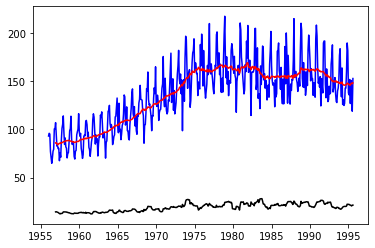

Results of ADFuller Test
ADF Statistic: -2.282661
p-value: 0.177621
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570
Not Stationary,Unit root present


In [7]:
test_stationary(df)

# Time Shift Transformation

In [8]:
df['Shift']=df['Beer']-df['Beer'].shift(12)
df.head(20)

,Beer,Shift
Month,,
1956-01-01,93.2,NaN
1956-02-01,96.0,NaN
1956-03-01,95.2,NaN
1956-04-01,77.1,NaN
1956-05-01,70.9,NaN
1956-06-01,64.8,NaN
1956-07-01,70.1,NaN
1956-08-01,77.3,NaN
1956-09-01,79.5,NaN


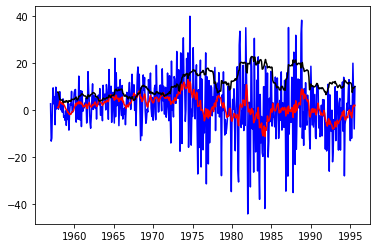

Results of ADFuller Test
ADF Statistic: -2.896762
p-value: 0.045726
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570
Stationary,Unit root not present


In [9]:
test_stationary(df['Shift'].dropna())

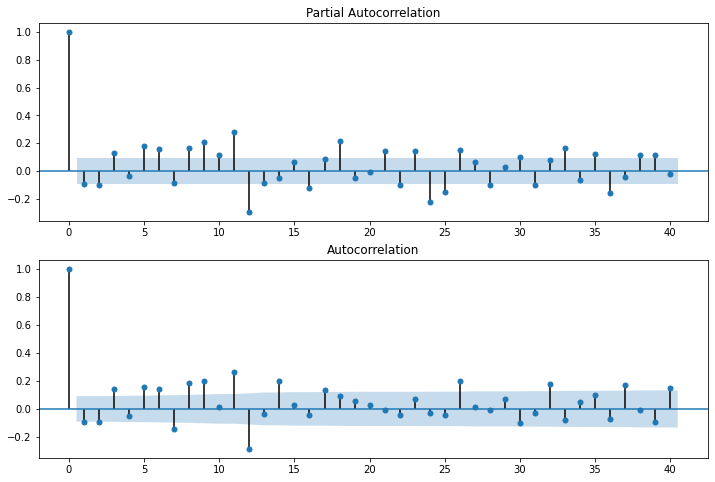

In [10]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
    
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_pacf(df['Shift'].dropna(),ax=ax1,lags=40)
ax2=fig.add_subplot(212)
fig=plot_acf(df['Shift'].dropna(),ax=ax2,lags=40)

# Building Model

In [11]:
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(df['Beer'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
model_fit=model.fit()

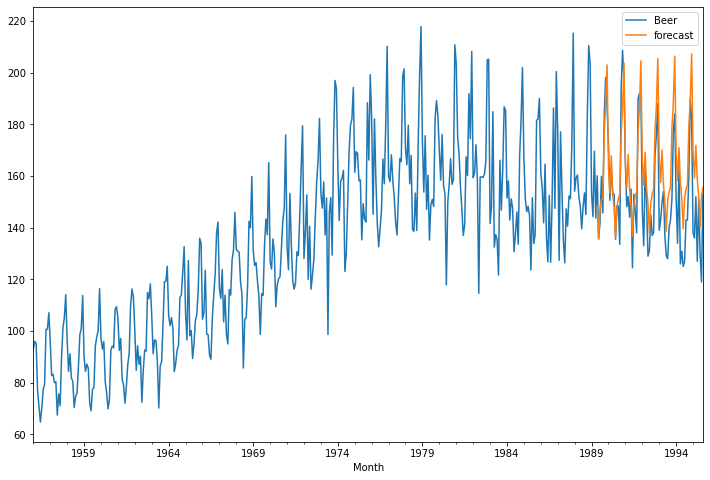

In [12]:
df['forecast']=model_fit.predict(start=400,end=475,dynamic=True)
df[['Beer','forecast']].plot(figsize=(12,8))